# Predicting Survivors of the Titanic
By Karl Heyer

In this project I will analyze Kaggle's dataset of Titanic passengers (https://www.kaggle.com/c/titanic/data) and use machine learning to predict the survivability of passengers on the titanic.

# Contents 
1. Project Introduction
    * 1.1 Project Objective
    * 1.2 Historical Context - The Sinking of the Titanic
2. Project Setup
    * 2.1 Import Libraries
    * 2.2 Load Data
    * 2.3 High Level Data Overview
3. Data Cleaning and Analysis 
    * 3.1 Age and Sex
    * 3.2 Cabin
    * 3.3 Embarked
    * 3.4 Fare
    * 3.5 Parch and SibSp
    * 3.6 Ticket Class
    * 3.7 Name and Title
    * 3.8 Ticket
    * 3.9 Final Visualizations 
4. Modeling
    * 4.1 Preparation of Data
    * 4.2 Algorithm Selection
    * 4.3 SVM
    * 4.4 Decition Trees
    * 4.5 Adaboost
    * 4.6 Gradient Boost
    * 4.7 Random Forest
    * 4.8 Ensemble Analysis and Prediction 1
    * 4.9 Pipeline Methods and Prediction 2
5. Predictions
    * 5.1 Model Predictions
    * 5.2 Analysis and Conclusions

# 1. Project Introduction

## 1.1 Project Objective
Predict survival on the Titanic using data about passengers

## 1.2 Historical Context - The Sinking of the Titanic
Built between 1909 and 1911, the RMS Titanic was the largest ship afloat at the time it entered service. It was the pinnacle of opulence, a luxury experience on a ship so large it was considered unsinkable. On the Titanic's maiden voyage, the ship struck an iceberg which caused sever damage to the ship's hull. Over the course of two hours and 40 minutes, the ship sank. Of the 2224 passengers on board, over 1500 perished. The Titanic was totally unprepared for such a disaster. The ship only had life boat capacity for approximately 1200 people, and many lifeboats were launched half full. The ship was largely segregated by economic class, with wealthier passengers enjoying higher decks and nicer facilities. The deck layout proved crucial during the sinking, as passnegers in the lower decks had less access to the life boats kept at the top of the ship. A disproportionate number of men perished, as a "Women and children first" evacuation rule was strictly enforced.

Here is a breakdown of the Titanic's deck structure:
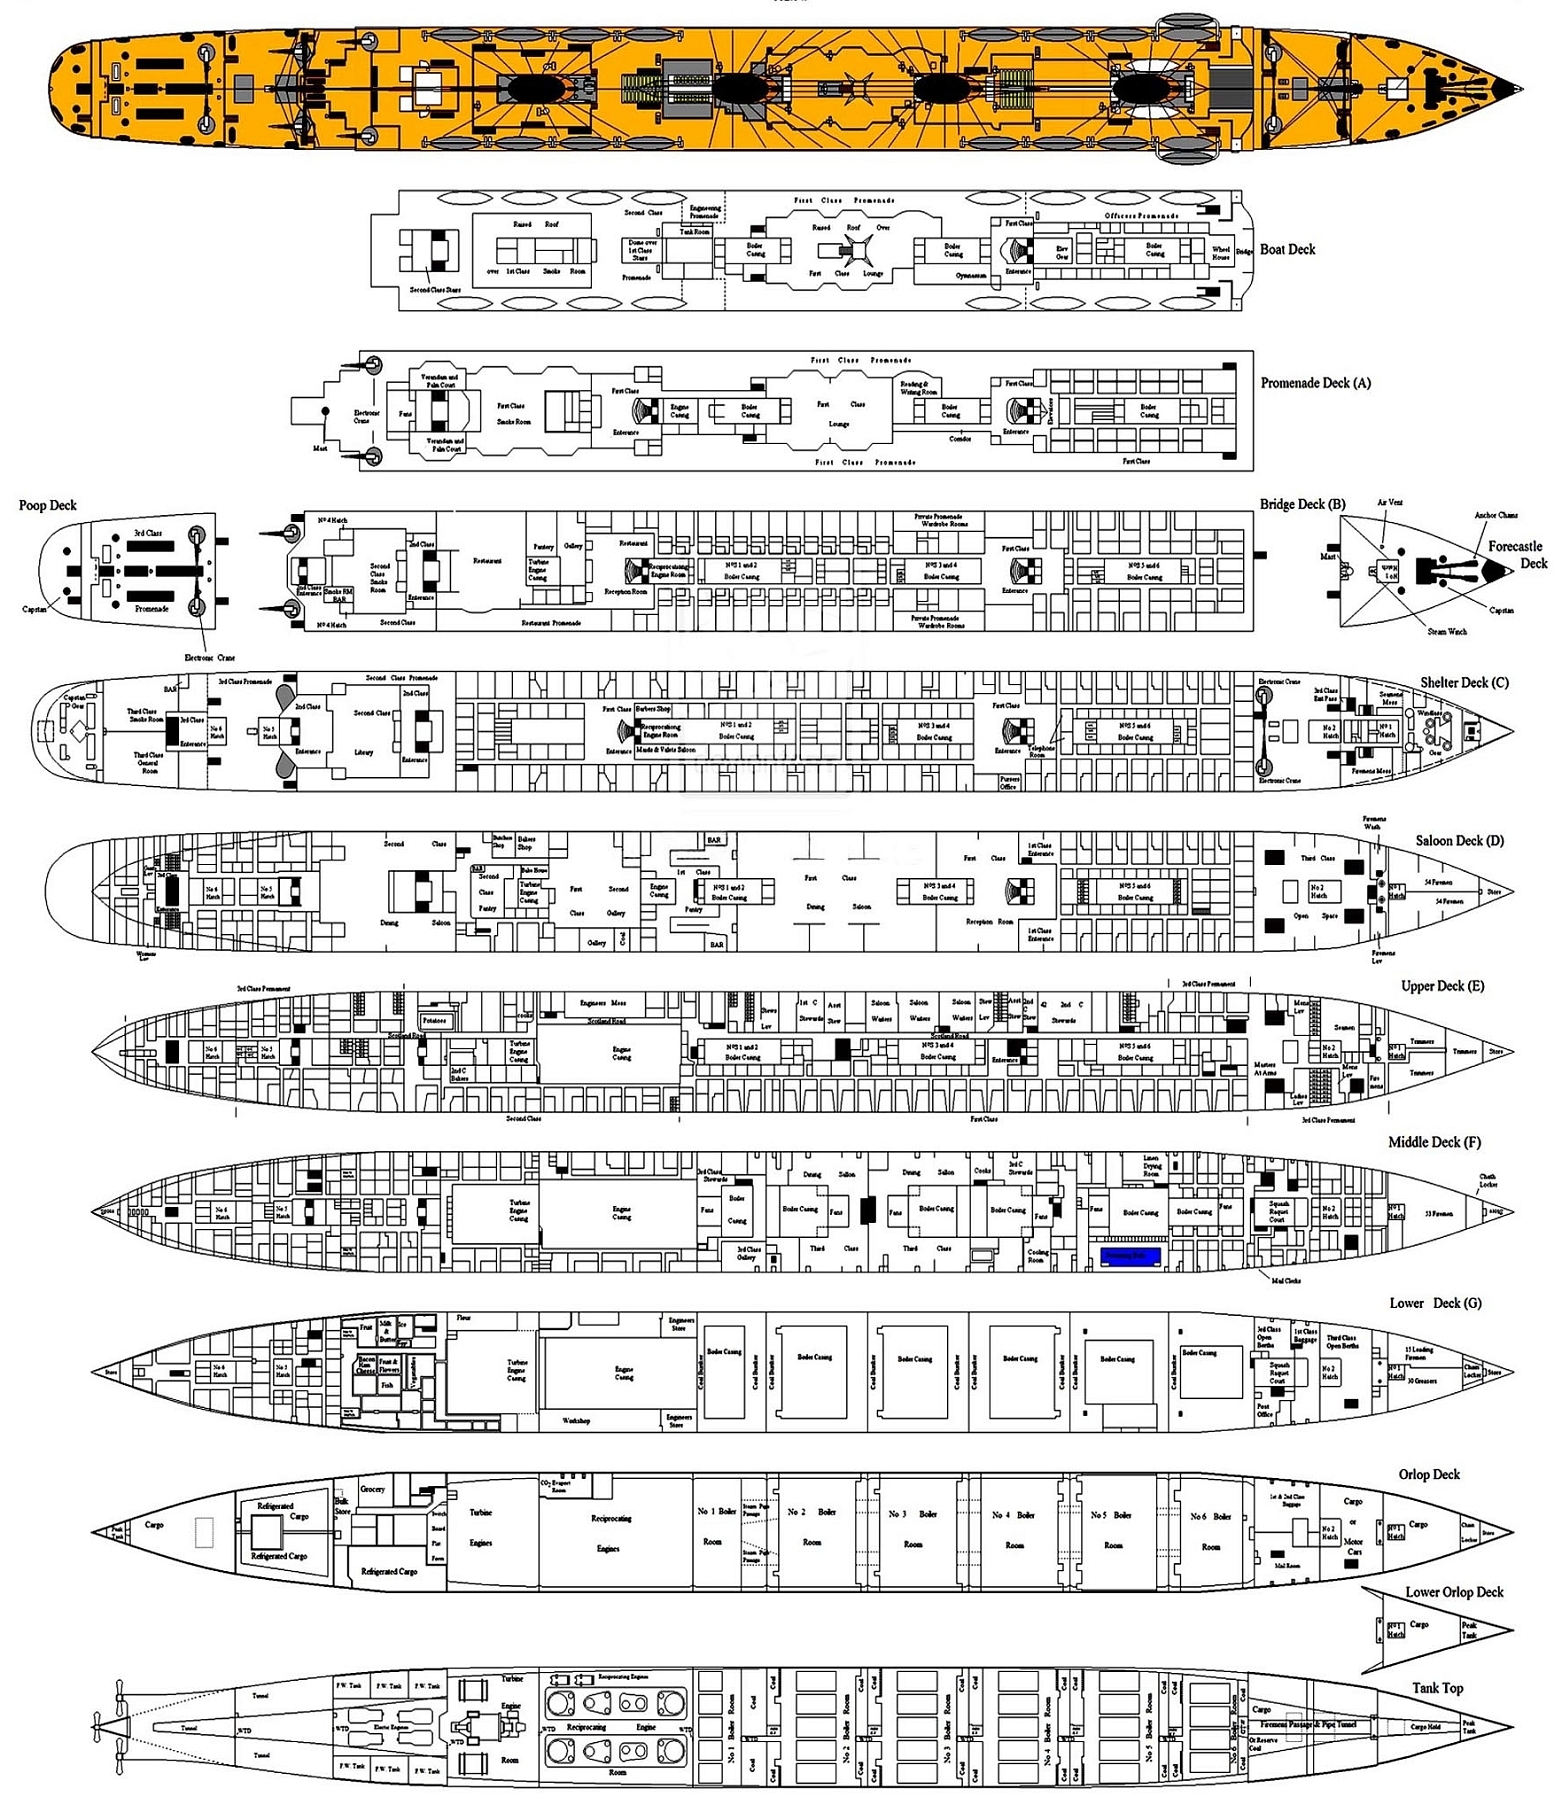

In this project, I will analyze data on the passengers of the Titanic and their survival outcomes to build a model that will predict survivability of a passenger based on age, sex, ticket class, cabin location, and other factors. 

## 2. Project Setup

# 2.1 Import Libraries
This project uses standard machine learning libraries available in scikit-learn along with pandas and numpy for data anlysis and matplotlib for data visualization.

In [259]:
#Import modules
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline



## 2.2 Import Data
Data is provided by Kaggle, available at https://www.kaggle.com/c/titanic/data

In [24]:
#Load data
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

#Merge datasets to clean simultaneously
full_set = train.append(test, ignore_index=True, sort=True)

#Make set without passenger ID, makes some downstream visualizations easier
data = full_set.copy()
data = data.drop('PassengerId',1)

## 2.3 High Level Data Overview
Lets take a look at the data

In [3]:
full_set.head(15)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


A breakdown of the data available:
* Age - age of the passenger, as an integer value. Missing values present
* Cabin - cabin where the passenger stayed. Many missing values
* Embarked - the port at which the passenger joined the Titanic
* Fare - how much the pasenger paid for a ticket
* Name - name of the passenger, usually with a title or prefix of some sort
* Parch - number of parents/children aboard
* Pclass - ticket class, with first class (1) being the most expensive
* Sex - male or female
* SibSp - number of siblings/spouses aboard
* Survived - did the passenger survive or not?
* Ticket - Ticket number for the passenger, in a variety of formats



Lets look at some high level statistics, correlations, and data quality.

First lets get an idea of how many missing values are present.

In [4]:
full_set.isnull().sum() 

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

There's a good number of missing values. It looks like most of the data is missing for Cabin. A good amount of the age data is also missing. Survived shows 418 missing values - this is just the test data for the problem. I merged the two to clean the data simultaneously. Embarked and Fare are missing a small number of values.

Now lets look at some high level statistics on the numerical data:

In [26]:
data.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


Age:
   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The average passenger was about 30. The minimim age - 0.17 - I assume is a measure in months. There were a lot of families with small children onboard.

Fare:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There's a pretty good range on the fare, going from as low as a few dollars up to \$512 - that's a five figure ticket these days. There's also an interesting difference between the mean of \$33 and the 50th percentile of $14 . It looks like the high rollers in first class are dragging the average up.

Parch and SibSp:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From this data, it looks like most passengers were traveling solo, or with a single other family member. On the high outlier side, some large families were on the Titanic.

Pclass:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We shouldn't look too deeply into calculated values from a set of a set of three discrete classes, but the calculated "mean class" of 2.29 tells us that most of the passengers were of class 2 or class 3, rather than the expensive first class.

Survived:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;38 \% average survival. Not a good number.

Now lets look at some high level correlations in the data:

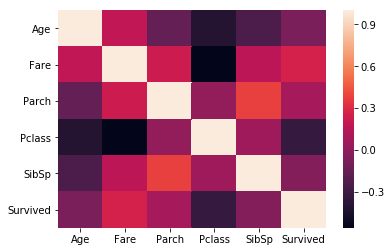

In [29]:
plt.clf()
corr = data.corr()
sns.heatmap(corr)
plt.show()

While there are no obvious red flags in the correlation, there are some interesting nuances. Pclass has a strong negative correlation with age, fare, and survival. When we consider that Pclass is currently being interpreted as a numerical value ranging from 1 to 3, we can infer that age, fare and survival increase with decreasing class. Or to put it another way, people in first class paid more, were generally older, and had a better chance of survival. 

This makes intuitive sense. First class tickets are more espensive. People who can afford first class would be older. People in first class would be in one of the top decks closest to the life boats.

Now lets start looking at the data in more detail.

# 3. Data Cleaning and Analysis

## 3.1 Age and Sex
Lets look at these together to get a basic understanding of the demographics on the Titanic. First lets look at the distribution of age and sex with respect to survivability.

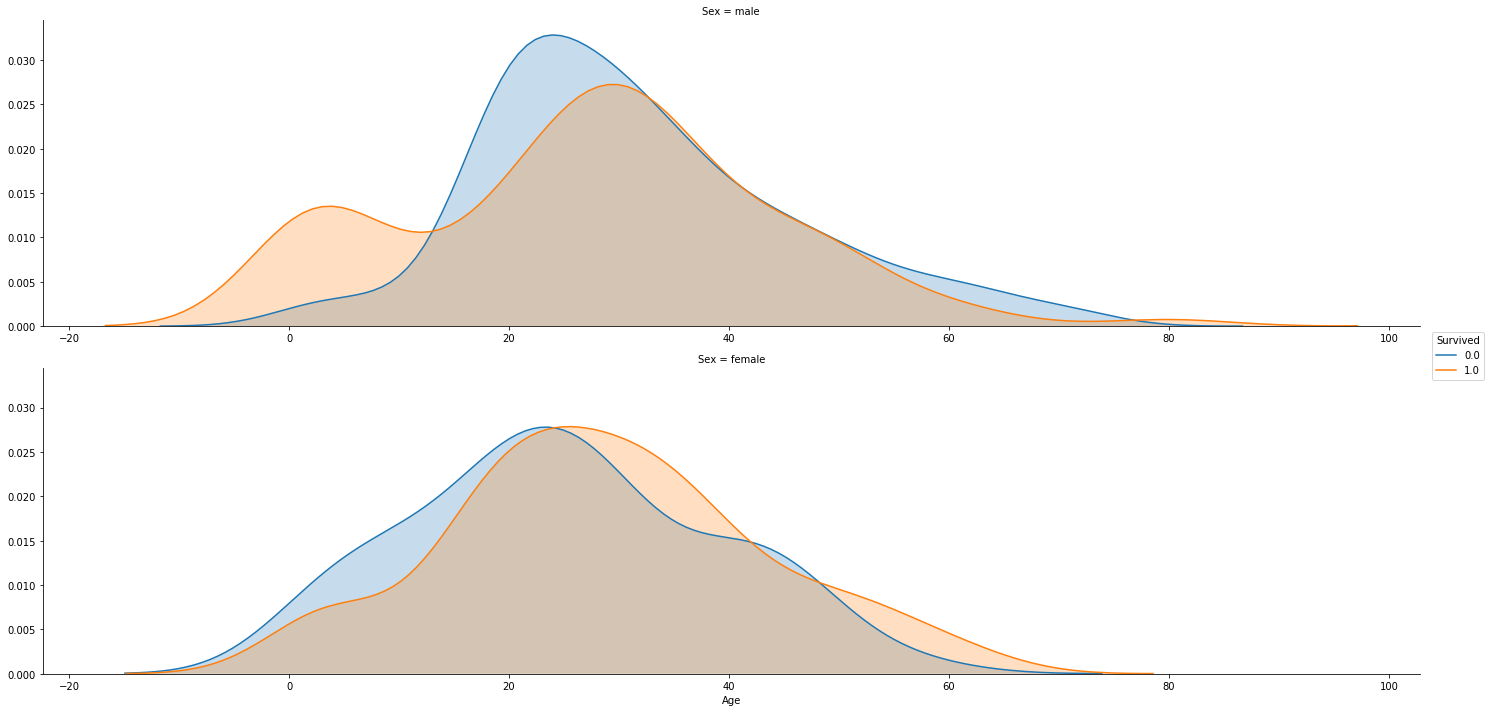

In [37]:
plt.clf()

facet = sns.FacetGrid(full_set, hue='Survived', aspect=4, row='Sex', size=5)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()

plt.show()

At first glance this plot seems strange, because the distribution of age values (all positive numbers) drifts into negative numbers. I assume this is just a quirk of the kdeplot function estimating probability densities for values close to zero.

Lets consider the shapes of these curves, keeping the Titanic's "women and children first" evacuation policy in mind. Looking at the distribution for male survivors, there's a distinct peak of young men who survived the sinking - children being evacuated. The second peak in the male survivors seems to be older men. Meanwhile, the male fatalities peak looks younger.

The female survival surves have more similarity to each other than the male survival curves do. Maybe the "women and children first" policy meant that female survival had more to do with getting a lucky lifeboat spot than with age.

Taking a more direct look at sex and survival, we can see the effect of putting women and children first:

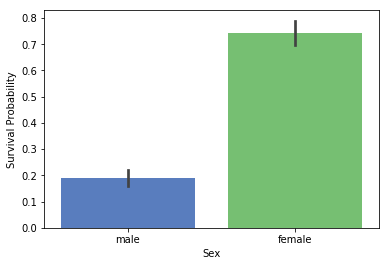

In [105]:
plt.clf()
g = sns.barplot(x="Sex",y="Survived",data=full_set, palette = 'muted')
g = g.set_ylabel("Survival Probability")
plt.show()

Now we need to clean the age and sex data. All the missing NaN values for age will be filled in with the mean age. Sex will be made into a binary, with male = 0 and female = 1.

In [48]:
#Replace NaN values in age with average age
age_fixed = pd.DataFrame()
age_fixed['Age'] = full_set.Age.fillna( full_set.Age.mean() )
age_fixed.describe()

,Age
count,1309.000000
mean,29.881138
std,12.883193
min,0.170000
25%,22.000000
50%,29.881138
75%,35.000000
max,80.000000


In [50]:
sex_fixed = pd.DataFrame()
sex_fixed['Sex'] = full_set['Sex']
sex_fixed = sex_fixed.replace({'male':0}).replace({'female':1})

sex_fixed.describe()

,Sex
count,1309.000000
mean,0.355997
std,0.478997
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## 3.2 Cabin
Lets look at the how cabin relates to survivability. There are lots of different cabin values. To deal with this variable, I'm going to just look at the deck of the ship a cabin is in. Referring back to the Titanic schematic image above, deck can serve as a proxy for how deep in the ship someone was. We also need to deal with the massive amount of missing cabin data. Since there is nothing to go on, all missing values will be assigned "Cabin X".
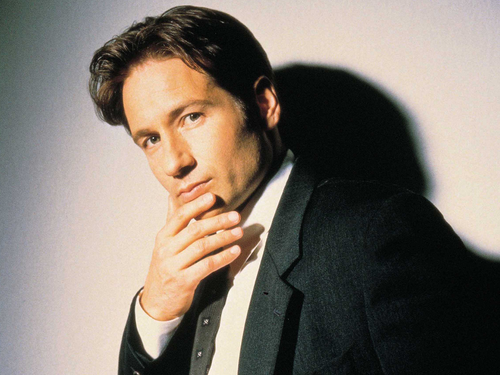

In [55]:
cabin_df = pd.DataFrame()
cabin_df['Deck'] = full_set.Cabin.fillna('X')
cabin_df['Deck'] = [cabin_df['Deck'][i][0] for i in range(len(cabin_df['Deck']))]
cabin_df['Deck'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

We can see that Cabin X makes up most of our data set. This variable might not be very helpful. Lets see if we can find any correlation with survivability.

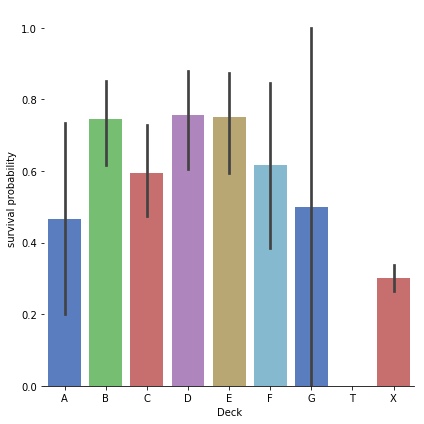

In [59]:
plt.clf()
cabin_df['Survived'] = full_set.Survived
g = sns.factorplot(x="Deck", y="Survived", data=cabin_df.sort_values(by='Deck'), kind="bar", size = 6 , palette = "muted", row_order=['T','A','B','C','D','E','F','G','X'])
g.despine(left=True)
g = g.set_ylabels("survival probability")
plt.show()

There doesn't appear to be a strong correlation here. For decks A-G, when you consider the error bars on the plot, there isn't a significant difference between them. Decks B, D and E seem to have higher survivability, but their values are still within the margin of error for other decks. The tight distribution around Cabin X is surprising, given how many values it encompasses.

To deal with cabin data in later analysis, I'm going to apply a numerical scale to cabin data, where deck G (the lowest) has a value of 0, and deck T (the highest) has a value of 7. Cabin X will be assigned a median value of 3.5. By this measure, deck value represents how deep in the ship a passenger was.

In [137]:
#Cabin values - X gets average value of decks
cabin_values = {'G':0., 'F':1., 'E':2., 'D':3., 'C':4., 'B':5., 'A':6., 'T':7., 'X':3.5}

cabin_fixed = pd.DataFrame()
cabin_fixed['Cabin'] = [cabin_values[i] for i in cabin_df['Deck']]


scaler = preprocessing.MinMaxScaler()
scaled_array = scaler.fit_transform(cabin_fixed['Cabin'].values.astype(float).reshape(-1,1))
cabin_fixed['Cabin'] = scaled_array
cabin_fixed.describe()

,Cabin
count,1309.000000
mean,0.505293
std,0.097874
min,0.000000
25%,0.500000
50%,0.500000
75%,0.500000
max,1.000000


## 3.3 Embarked
The embarked data shows what port each passenger boarded the Titanic at. First lets get a look at the data.

In [64]:
print full_set['Embarked'].value_counts()
print '\n', full_set['Embarked'].describe()
print '\n', full_set['Embarked'].isnull().sum()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

2


Most of the data is present. There are two missing values, but this dataset is much more complete than the Cabin data. Lets look at survivability and port of embarkation.

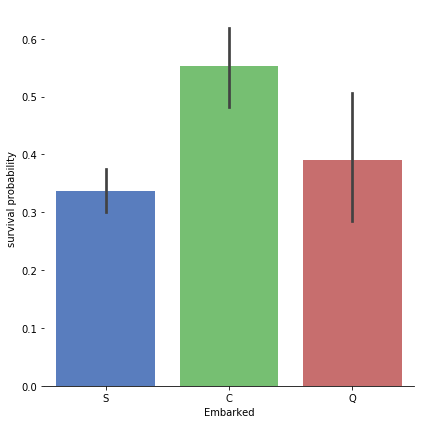

In [65]:
#Look at survivability and embarked status

plt.clf()
g = sns.factorplot(x="Embarked",y="Survived",data=train, kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
plt.show()

There does appear to be some correlation between port of embarkation and survival, with passengers boarding at the Port of Cherbourg having a higher survival chance than others. However I am hesitant to draw any conclusions from this, as the port of boarding should not have any effect on its own. Maybe there is a relationship between port and other factors like ticket fare, ticket class, or cabin location that explain the correlation.

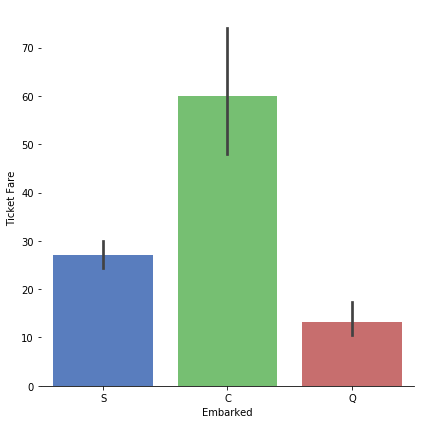

In [69]:
#Look at ticket fare and embarked status

plt.clf()
g = sns.factorplot(x="Embarked",y="Fare",data=train, kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Ticket Fare")
plt.show()

So port C passengers did tend to pay significantly more for their tickets, and likely had higher class, higher deck cabins.

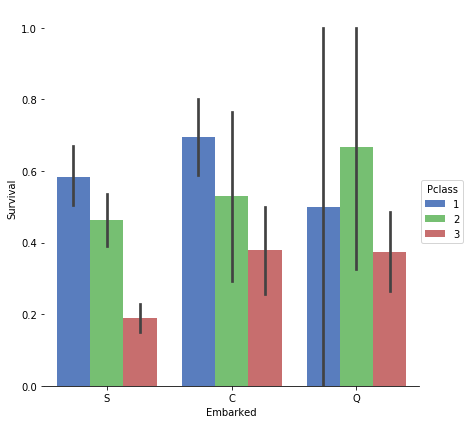

In [74]:
#Look at ticket fare and embarked status with class

plt.clf()
g = sns.factorplot(x="Embarked",y="Survived",data=train, kind="bar", size = 6 , palette = "muted", hue='Pclass')
g.despine(left=True)
g = g.set_ylabels("Survival")
plt.show()

Breaking down embarked data by cabin class and survival shows that first class passengers for Port C have a slightly higher survival chance than passengers from other ports. But what about the actual count of passengers? Maybe the aggregate survival chance of Port S and Port Q is brought down by more second and third class passengers?

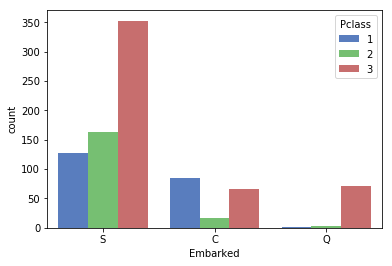

In [87]:
#Look at ticket fare and embarked status with class

plt.clf()
g = sns.countplot(x="Embarked",data=train, hue='Pclass', palette = 'muted')
#g.despine(left=True)
#g = g.set_ylabels("Pclass")
plt.show()

Okay now this is starting to make sense. Port C and Port Q have a much lower number of passengers than Port S. The variations in the data that correlate with Embarked may just be due to looking at a smaller sample size. Port Q passengers were mostly third class, low deck passengers, which may explain the low aggregate survival of Port Q passengers. Port C has a much higher proportion of passengers in first class compared to Port S, which has a high number of third class passengers. The higher aggregate survival in Port C passengers may just be due to a relative overrepresentation of first class passengers.

Now for managing the data. The two missing values will be filled in as Port X. Port data is discrete, so lets separate it into four categories (S, C, Q, X), with binary outcomes.

In [88]:
#Embarked doesn't make sense to scale I think. Lets separate it into categories with binary outcomes

embarked_fixed = pd.DataFrame()
embarked_fixed['Embarked'] = full_set.Embarked.fillna('X')
embarked_fixed = pd.get_dummies([i for i in embarked_fixed['Embarked']], prefix= 'Embarked')
embarked_fixed.head()

,Embarked_C,Embarked_Q,Embarked_S,Embarked_X
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


## 3.4 Fare
Now lets look at data for passenger fare. By now we have some intuition for how this may relate to variables like deck, ticket class and survival. Pricier tickets get better class cabins, closer to the top of the boat with better access to lifeboats. Lets look at the data.

In [89]:
#Fare data
print full_set['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64


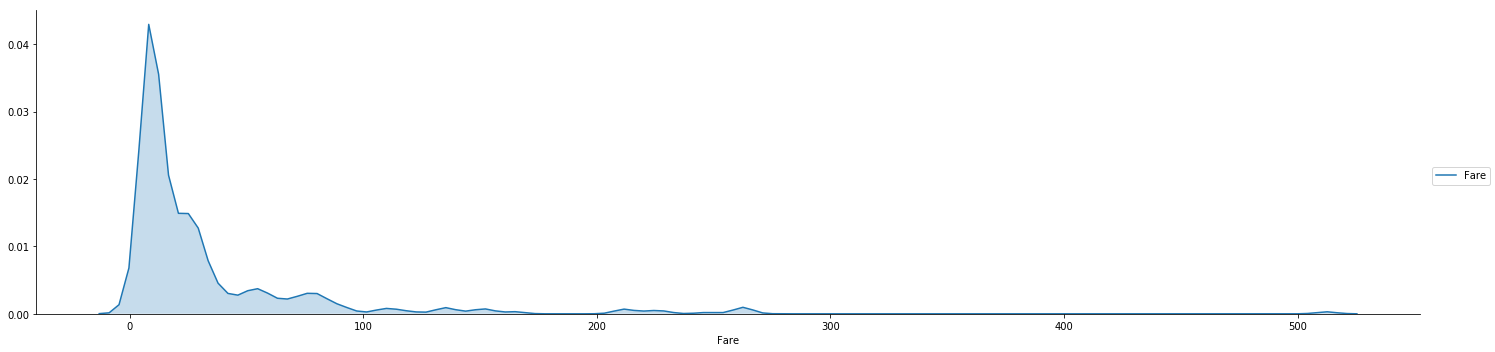

In [93]:
plt.clf()

facet = sns.FacetGrid(full_set, aspect=4, size=5)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.add_legend()

plt.show()

The fare distribution is interesting. Most ticket prices up to the 75th percentile are less than \$50, but a small number of wealthy people could afford really expensive tickets.

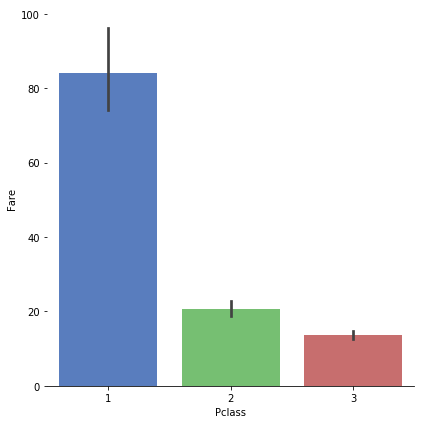

In [91]:
#Look at ticket fare and embarked status with class

plt.clf()
g = sns.factorplot(x="Pclass",y="Fare",data=train, kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")
plt.show()

As expected first class tickets are much more expensive.

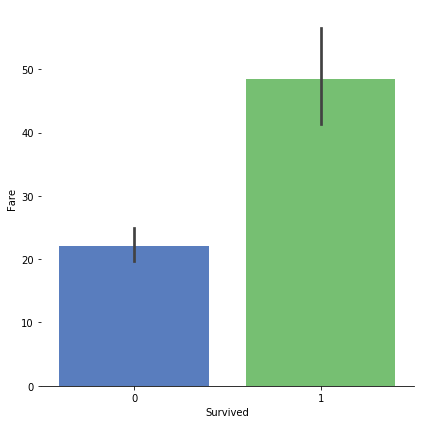

In [96]:
#Look at ticket fare and embarked status with class

plt.clf()
g = sns.factorplot(x="Survived",y="Fare",data=train, kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")
plt.show()

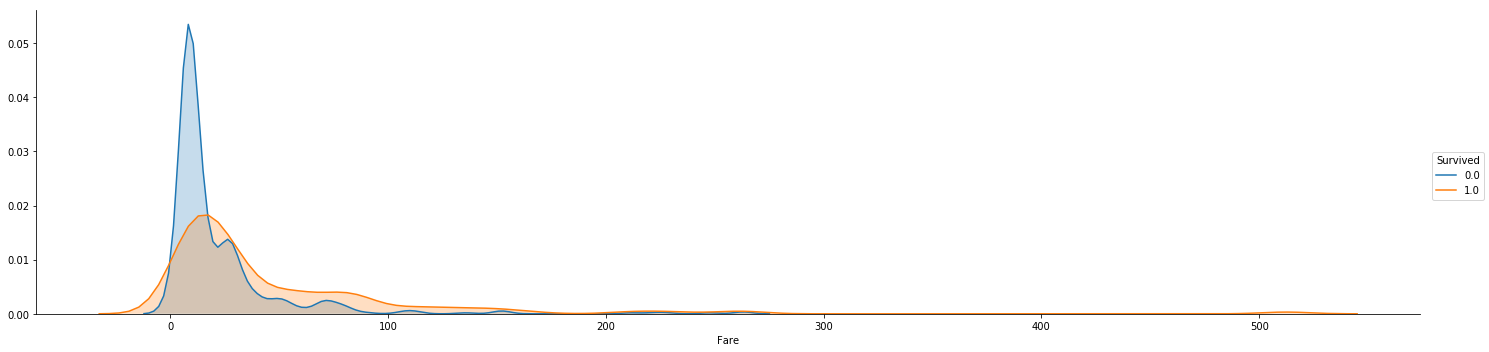

In [98]:
plt.clf()

facet = sns.FacetGrid(full_set, aspect=4, size=5, hue='Survived')
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.add_legend()

plt.show()

Also expected is that pricier tickets have, on average, better survivability.

Now lets deal with null values by putting in the average ticket price, similar to what we did with age.

In [99]:
full_set['Fare'].isnull().count()

1309

In [100]:
fare_fixed = pd.DataFrame()
fare_fixed['Fare'] = full_set.Fare.fillna(full_set.Fare.mean())

fare_fixed.describe()

,Fare
count,1309.000000
mean,33.295479
std,51.738879
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


## 3.5 Parch and SibSp
Both these values refer to the family size of the passenger on board, so lets wrap them up into a single variable.

In [101]:
family = pd.DataFrame()
family[ 'FamilySize' ] = full_set[ 'Parch' ] + full_set[ 'SibSp' ] + 1

In [102]:
print family['FamilySize'].value_counts()
print '\n', family['FamilySize'].describe()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

count    1309.000000
mean        1.883881
std         1.583639
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: FamilySize, dtype: float64


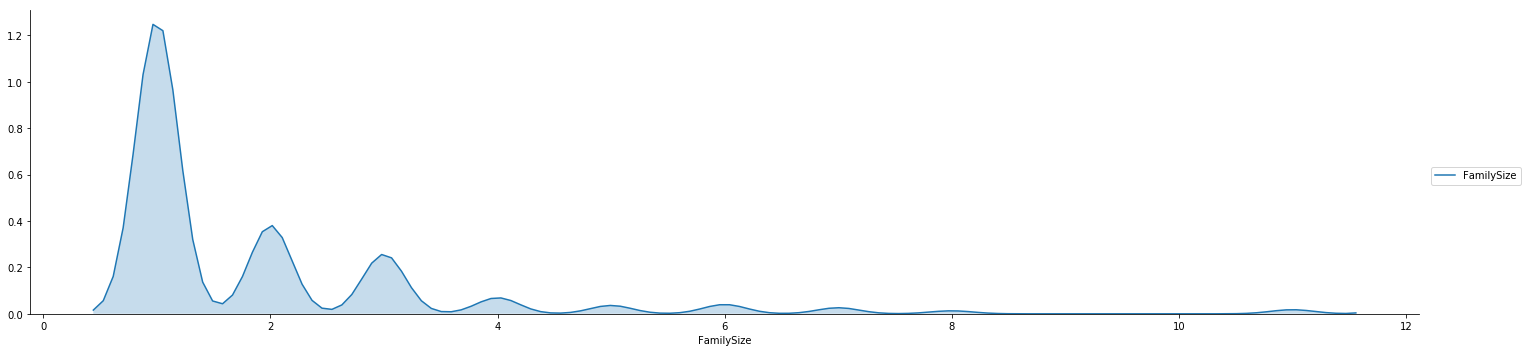

In [103]:
plt.clf()

facet = sns.FacetGrid(family, aspect=4, size=5)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.add_legend()

plt.show()

From the data distribution, most passengers traveled solo, but some outliers traveled with large families.

How does family size relate to survival?

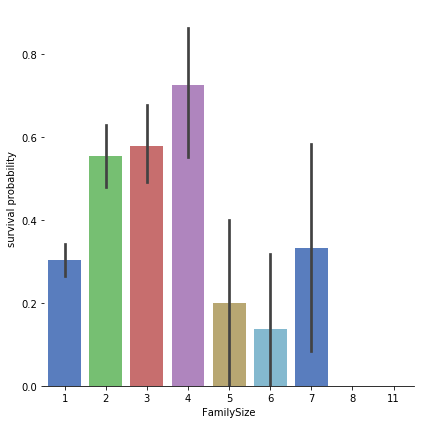

In [104]:
plt.clf()
fam_plt = pd.DataFrame()
fam_plt['FamilySize'] = family['FamilySize'][:891]
fam_plt['Survived'] = train['Survived']

plt.clf()
g = sns.factorplot(x="FamilySize",y="Survived",data=fam_plt, kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
plt.show()

Families of 2-4 individuals show the best survival rate. Solo travelers have a noticeably lower survival rate, likely due to evacuation priorities. Larger families do not seem to fare well, possibly due to logistical challenges in evacuating.

## 3.6 Ticket Class
The subject of ticket class has come up before in relation to fare and port of embarkation, but lets look directly at the class data.

In [106]:
print full_set['Pclass'].value_counts()
print '\n', full_set['Pclass'].describe()

3    709
1    323
2    277
Name: Pclass, dtype: int64

count    1309.000000
mean        2.294882
std         0.837836
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Pclass, dtype: float64


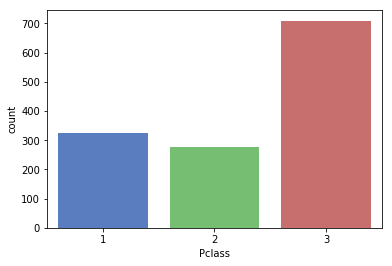

In [108]:
#Look at number of passengers in a given class

plt.clf()
g = sns.countplot(x="Pclass",data=full_set, palette = 'muted')
plt.show()

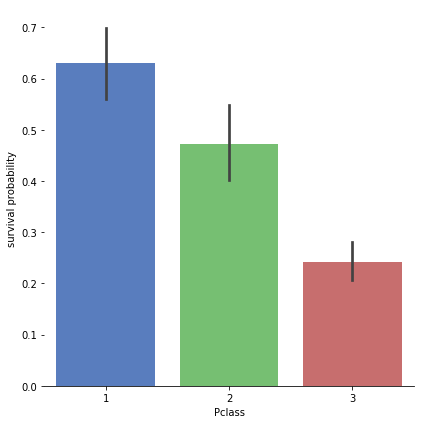

In [109]:
plt.clf()
g = sns.factorplot(x="Pclass",y="Survived",data=train, kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
plt.show()

Third class was by far the most common kind of class. Third class also has the lowest survivability. 

Pclass will be split into 3 binary variables, one for each class.

In [113]:
#Treat Pclass like embarked
Pclass_fixed = pd.DataFrame()
Pclass_fixed['Pclass'] = full_set.Pclass
Pclass_fixed = pd.get_dummies([i for i in Pclass_fixed['Pclass']], prefix = 'Class')

Pclass_fixed.head()

,Class_1,Class_2,Class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


## Name and Title
Name data will be converted into the title of the person to give a better idea of the passenger's demographics.

* Titles Used:
    * Officer - Officer or crewmember of the ship
    * Mr - Adult men
    * Master - Young men
    * Mrs - Adult women
    * Miss - Young women
    * Royalty M - High class men
    * Royalty F - High class women

In [116]:
title = pd.DataFrame()
title[ 'Title' ] = full_set[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty M",
                    "Don":        "Royalty M",
                    "Sir" :       "Royalty M",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty F",
                    "Dona":       "Royalty F",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty F"

                    }

title[ 'Title' ] = title.Title.map( Title_Dictionary )
title['Title'].value_counts()
title = pd.get_dummies( title.Title )

title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty F,Royalty M
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0


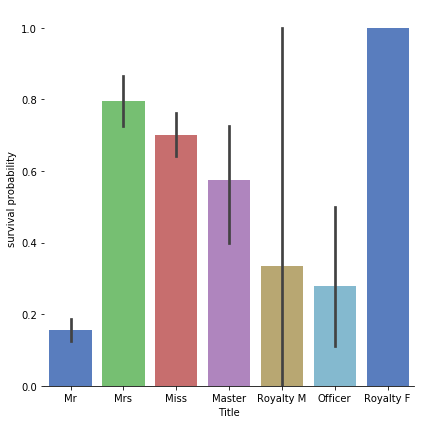

In [117]:
title_plt = pd.DataFrame()

title_plt['Title'] = train[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )
title_plt[ 'Title' ] = title_plt.Title.map( Title_Dictionary )

title_plt['Survived'] = train['Survived']

plt.clf()
g = sns.factorplot(x="Title",y="Survived",data=title_plt, kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
plt.show()

Unsurprisingly, adult men and officers of the ship have the lowest survivability, while high class women have the highest, followed by average young women, adult women and average young men. Royalty M has a better survivability than average men, along with a very high variance.

## 3.8 Ticket
Ticket information is difficult to deal with. There are a huge number of ticket formats, and extracting information from them is difficult. Ultimately I will not use ticket information in modeling, because I believe it adds a huge number of features without adding much information, especially given how most of the ticket information is missing. Nonetheless, here are some attempts at managing ticket information:

In [125]:
#Extract prefix from ticket
ticket_fixed = pd.DataFrame()

ticket = []
for i in list(full_set['Ticket']):
    if not i.isdigit():
        ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    
    else:
        ticket.append('X')


ticket_fixed['Ticket'] = ticket
ticket_fixed['Ticket'].value_counts()

X          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
STONO       14
SCPARIS     14
A4          10
FCC          9
C            8
SOC          8
STONO2       7
SOPP         7
SCAH         5
SCParis      5
LINE         4
WEP          4
PP           4
FC           3
SOTONO2      3
SC           2
SCA4         2
SWPP         2
PPP          2
SCOW         1
SP           1
SOP          1
SCA3         1
STONOQ       1
CASOTON      1
LP           1
A            1
Fa           1
AQ4          1
AQ3          1
AS           1
Name: Ticket, dtype: int64

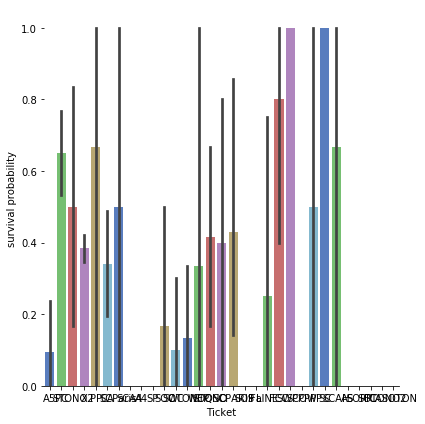

In [126]:
ticket_plt = pd.DataFrame()
ticket_plt['Ticket'] = ticket_fixed['Ticket'][:891]
ticket_plt['Survived'] = train['Survived']

plt.clf()
g = sns.factorplot(x="Ticket",y="Survived",data=ticket_plt, kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
plt.show()

In [129]:

ticket = pd.get_dummies( ticket_fixed[ 'Ticket' ] , prefix = 'Ticket' )
ticket['Survived'] = full_set['Survived']

ticket.shape
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X,Survived
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


In [130]:
ticket.describe()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,0.000764,0.007639,0.021390,0.000764,0.000764,0.000764,0.006112,0.051948,0.000764,0.002292,...,0.018335,0.000764,0.010695,0.005348,0.000764,0.001528,0.011459,0.003056,0.731092,0.383838
std,0.027639,0.087103,0.144737,0.027639,0.027639,0.027639,0.077967,0.222007,0.027639,0.047836,...,0.134210,0.027639,0.102902,0.072959,0.027639,0.039073,0.106473,0.055216,0.443561,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
ticket.corr()['Survived']

Ticket_A               NaN
Ticket_A4        -0.070234
Ticket_A5        -0.092199
Ticket_AQ3             NaN
Ticket_AQ4             NaN
Ticket_AS        -0.026456
Ticket_C          0.002496
Ticket_CA        -0.019137
Ticket_CASOTON   -0.026456
Ticket_FC        -0.026456
Ticket_FCC        0.064285
Ticket_Fa        -0.026456
Ticket_LINE      -0.018481
Ticket_LP              NaN
Ticket_PC         0.147062
Ticket_PP         0.033803
Ticket_PPP        0.011329
Ticket_SC         0.042470
Ticket_SCA3            NaN
Ticket_SCA4      -0.026456
Ticket_SCAH       0.033803
Ticket_SCOW      -0.026456
Ticket_SCPARIS    0.008185
Ticket_SCParis    0.016040
Ticket_SOC       -0.036769
Ticket_SOP       -0.026456
Ticket_SOPP      -0.045876
Ticket_SOTONO2   -0.037436
Ticket_SOTONOQ   -0.067404
Ticket_SP        -0.026456
Ticket_STONO      0.007887
Ticket_STONO2     0.019667
Ticket_STONOQ          NaN
Ticket_SWPP       0.060095
Ticket_WC        -0.062182
Ticket_WEP       -0.006036
Ticket_X          0.001492
S

We can break ticket prefixed up into binary variables, but none of them show any real correlation between ticket type and survival. Overall this seems to just add noise into the data.

## 3.9 Final Visualizations
In this section, lets string back together the cleaned data and look at high level correlations with the cleaned data.

In [138]:
full_fixed = pd.concat( [ age_fixed, cabin_fixed, embarked_fixed, fare_fixed, title, family, Pclass_fixed,
                            sex_fixed, full_set['Survived']], axis=1)

full_fixed.head()

,Age,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_X,Fare,Master,Miss,Mr,Mrs,Officer,Royalty F,Royalty M,FamilySize,Class_1,Class_2,Class_3,Sex,Survived
0,22.0,0.500000,0,0,1,0,7.2500,0,0,1,0,0,0,0,2,0,0,1,0,0.0
1,38.0,0.571429,1,0,0,0,71.2833,0,0,0,1,0,0,0,2,1,0,0,1,1.0
2,26.0,0.500000,0,0,1,0,7.9250,0,1,0,0,0,0,0,1,0,0,1,1,1.0
3,35.0,0.571429,0,0,1,0,53.1000,0,0,0,1,0,0,0,2,1,0,0,1,1.0
4,35.0,0.500000,0,0,1,0,8.0500,0,0,1,0,0,0,0,1,0,0,1,0,0.0


In [139]:
full_fixed.corr()['Survived']

Age          -0.070323
Cabin         0.001600
Embarked_C    0.168240
Embarked_Q    0.003650
Embarked_S   -0.155660
Embarked_X    0.060095
Fare          0.257307
Master        0.085221
Miss          0.332795
Mr           -0.549199
Mrs           0.344935
Officer      -0.031316
Royalty F     0.060095
Royalty M    -0.006036
FamilySize    0.016639
Class_1       0.285904
Class_2       0.093349
Class_3      -0.322308
Sex           0.543351
Survived      1.000000
Name: Survived, dtype: float64

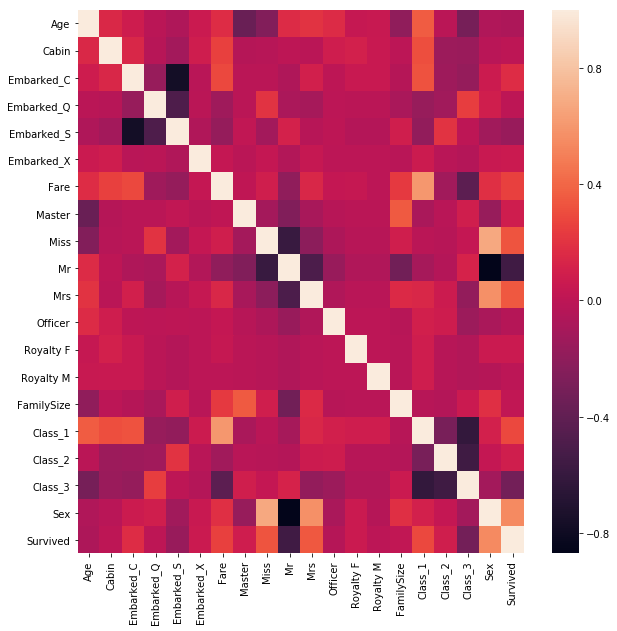

In [141]:
plt.clf()
corr = full_fixed.corr()

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr)
plt.show()

This heatmap shows some of the correlations we saw earlier. Being an adult male is negatively correlated with survival. Same with Class 3. First class and high fares correlate favorably.

With the data cleaned and ready to go, lets move onto modeling and predicting.

# 4. Modeling

## 4.1 Data Preparation
First lets make a few changes to the data to make it easier to put into a machine learning algorithm. Age, fare, deck, and family size will be normalized from 0 to 1.

In [142]:
scaler = preprocessing.MinMaxScaler()
scaled_array = scaler.fit_transform(age_fixed['Age'].values.astype(float).reshape(-1,1))
age_fixed['Age'] = scaled_array
age_fixed.describe()

,Age
count,1309.000000
mean,0.372180
std,0.161383
min,0.000000
25%,0.273456
50%,0.372180
75%,0.436302
max,1.000000


In [143]:
scaler = preprocessing.MinMaxScaler()
scaled_array = scaler.fit_transform(fare_fixed['Fare'].values.astype(float).reshape(-1,1))
fare_fixed['Fare'] = scaled_array
fare_fixed.describe()

,Fare
count,1309.000000
mean,0.064988
std,0.100988
min,0.000000
25%,0.015412
50%,0.028213
75%,0.061045
max,1.000000


In [144]:
scaler = preprocessing.MinMaxScaler()
scaled_array = scaler.fit_transform(family['FamilySize'].values.astype(float).reshape(-1,1))
family['FamilySize'] = scaled_array
fare_fixed.describe()

,Fare
count,1309.000000
mean,0.064988
std,0.100988
min,0.000000
25%,0.015412
50%,0.028213
75%,0.061045
max,1.000000


In [145]:
scaler = preprocessing.MinMaxScaler()
scaled_array = scaler.fit_transform(cabin_fixed['Cabin'].values.astype(float).reshape(-1,1))
cabin_fixed['Cabin'] = scaled_array
cabin_fixed.describe()

,Cabin
count,1309.000000
mean,0.505293
std,0.097874
min,0.000000
25%,0.500000
50%,0.500000
75%,0.500000
max,1.000000


In [146]:
full_fixed = pd.concat( [ age_fixed, cabin_fixed, embarked_fixed, fare_fixed, title, family, Pclass_fixed,
                            sex_fixed], axis=1)

full_fixed.head()

,Age,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_X,Fare,Master,Miss,Mr,Mrs,Officer,Royalty F,Royalty M,FamilySize,Class_1,Class_2,Class_3,Sex
0,0.273456,0.500000,0,0,1,0,0.014151,0,0,1,0,0,0,0,0.1,0,0,1,0
1,0.473882,0.571429,1,0,0,0,0.139136,0,0,0,1,0,0,0,0.1,1,0,0,1
2,0.323563,0.500000,0,0,1,0,0.015469,0,1,0,0,0,0,0,0.0,0,0,1,1
3,0.436302,0.571429,0,0,1,0,0.103644,0,0,0,1,0,0,0,0.1,1,0,0,1
4,0.436302,0.500000,0,0,1,0,0.015713,0,0,1,0,0,0,0,0.0,0,0,1,0


In [147]:
X_training_data = full_fixed[:891]
y_training_data = train['Survived']
X_testing_data = full_fixed[891:]

## 4.2 Model Overview
To analyze the data and build a predictive model, we will look at several machine learning algorithms. Support vector machines, decision trees, decision trees with adaboost, gradient boosting and random forests. For each model, we will determine the optimum feature number, optimize hyperparameters, and construct learning curves for the optimum feature number. Then we will feed the tuned models into a ensemble voting classifier.

In [209]:
#Generates training and testing accuracy data for different feature numbers, while also fitting the GridSearchCV model
def n_feat_opt(estimator, title, X, y):
    train_acc = []
    test_acc = []
    param_lst = []
    comp_lst = []
    for i in range(1,18):
        pca = PCA(n_components = i)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        X_train_trans = pca.fit_transform(X_train)
        X_test_trans = pca.transform(X_test)
        
        estimator.fit(X_train_trans, y_train)
        
        train_score = estimator.score(X_train_trans, y_train)
        test_score = cross_val_score(estimator.best_estimator_, X_test_trans, y_test, cv=6, n_jobs=-1)
        test_score = sum(test_score)/len(test_score)
        train_acc.append(train_score)
        test_acc.append(test_score)
        param_lst.append(estimator.best_params_)
        comp_lst.append(i)
    
    return train_acc, test_acc, param_lst, comp_lst

In [210]:
#Prints plot of training and testing accuracy with respect to feature number
def feat_print(train_acc, test_acc, comp_lst, title):
    plt.clf()
    plt.figure()
    plt.title(title)
    plt.xlabel("Features")
    plt.ylabel("Score")
    plt.plot(comp_lst, train_acc, 'o-', color='r', label='Training Score')
    plt.plot(comp_lst, test_acc, 'o-', color='g', label='Testing Score')
    plt.legend()
    return plt

In [211]:
#Generates model learning curves for a given feature number
def curve(estimator, title, X, y, n):
    pca = PCA(n_components=n)
    X_trans = pca.fit_transform(X)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_trans, y, cv=6, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## 4.3 SVM
Lets start with the SVM model

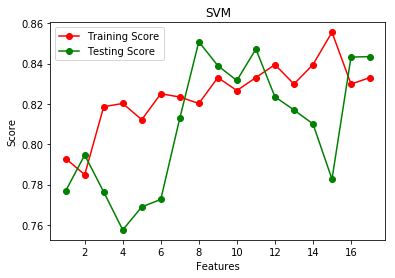

In [197]:
model_svm = svm.SVC(probability=True)
C_OPTIONS = [ 800, 900, 1000, 1100, 1200]
G_OPTIONS = [0.005,0.003, 0.001, 0.0008]
param_grid = [
    {
        'C': C_OPTIONS,
        'gamma': G_OPTIONS
    }]
grid_svm = GridSearchCV(model_svm, cv=6, n_jobs=-1, param_grid=param_grid, scoring='accuracy')
train_acc, test_acc, param_lst, comp_lst = n_feat_opt(grid_svm, 'SVM', X_training_data, y_training_data)

feat_print(train_acc, test_acc, comp_lst, 'SVM')
plt.show()

For SVM it looks like 11 features is the optimum value, after which the model starts to overfit.

In [202]:
#Best parameters for optimum feature number
print param_lst[comp_lst.index(11)]

{'C': 800, 'gamma': 0.003}


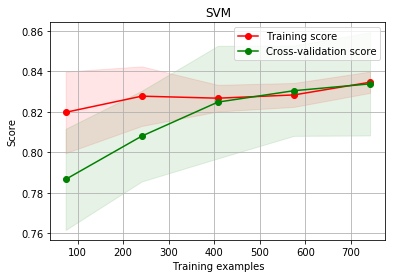

In [212]:
svm_model = svm.SVC(C=800, gamma=0.003, probability=True)
n_svm = 11
curve(svm_model, 'SVM', X_training_data, y_training_data, n_svm)
plt.show()

For 11 features, SVM training and testing converges around 400 examples. There is a decent amount of variance in the cross validation score.

## 4.4 Decision Trees
Same workflow, this time with decision trees.

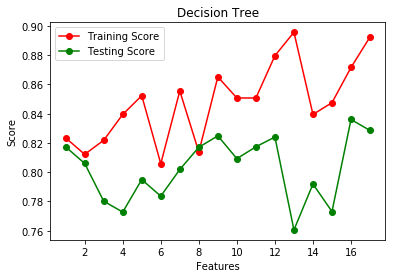

In [215]:
#Decision tree
model_dt = DecisionTreeClassifier()
maxdep = [3,4,5,6]
minsamp = [2,3,4,5]
param_grid = [
    {
        'max_depth': maxdep,
        'min_samples_split': minsamp
    }]


grid_dt = GridSearchCV(model_dt, cv=6, n_jobs=-1, param_grid=param_grid, scoring='accuracy')
train_acc, test_acc, param_lst, comp_lst = n_feat_opt(grid_dt, 'Decision Tree', X_training_data, y_training_data)
feat_print(train_acc, test_acc, comp_lst, 'Decision Tree')
plt.show()


Unsurprisingly decision trees overfit the training set. It looks like 11 features is a good feature point, after which training and testing scores diverge

In [217]:
#Best parameters for optimum feature number
print param_lst[comp_lst.index(11)]

{'min_samples_split': 2, 'max_depth': 3}


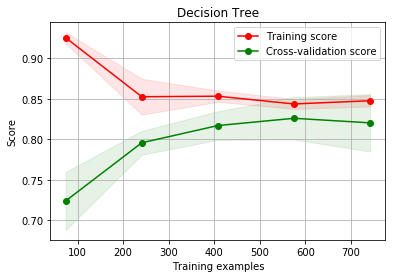

In [225]:
dt_model = DecisionTreeClassifier(min_samples_split=2, max_depth=3)
n_dt = 11
curve(dt_model, 'Decision Tree', X_training_data, y_training_data, n_dt)
plt.show()

The curves appear to converge at approximately 550 training examples, then diverge after due to overfitting

## 4.5 Adaboost
Same workflow using Adaboost with the default decision tree estimator.

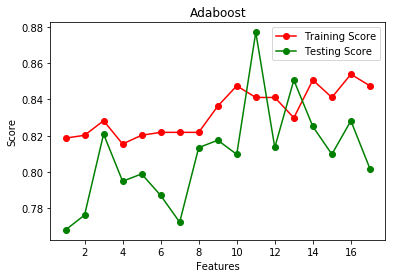

In [224]:
#Adaboost
model_adc = AdaBoostClassifier()

n_est = [30, 50,75,90]
learn = [0.03, 0.04, 0.05, 0.07, 0.1]
param_grid = [
    {
        'n_estimators': n_est,
        'learning_rate': learn
    }]

grid_adc = GridSearchCV(model_adc, cv=6, n_jobs=-1, param_grid=param_grid, scoring='accuracy')
train_acc, test_acc, param_lst, comp_lst = n_feat_opt(grid_adc, 'Adaboost', X_training_data, y_training_data)
feat_print(train_acc, test_acc, comp_lst, 'Adaboost')
plt.show()

Adaboost looks to have the best performance at 11 features. 

In [226]:
#Best parameters for optimum feature number
print param_lst[comp_lst.index(11)]

{'n_estimators': 75, 'learning_rate': 0.1}


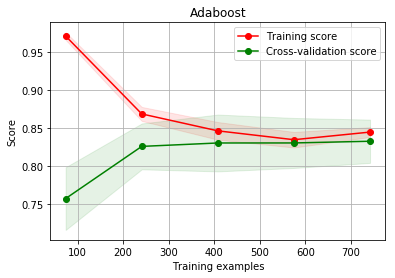

In [227]:
adc_model = AdaBoostClassifier(n_estimators=75, learning_rate=0.1)
n_ada = 11
curve(adc_model, 'Adaboost', X_training_data, y_training_data, n_ada)
plt.show()

Adaboost converges around 550 examples

## 4.6 Gradient Boost

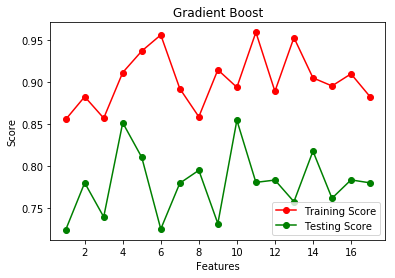

In [229]:
#Gradient Boost
model_gb = GradientBoostingClassifier()
max_dep = [3,4,5,6]
n_est = [30,40,50,80]
min_samp = [4,5,6,10]
param_grid = [
    {
        'n_estimators': n_est,
        'max_depth': max_dep,
        'min_samples_split':min_samp
    }]

grid_gbc = GridSearchCV(model_gb, cv=6, n_jobs=-1, param_grid=param_grid, scoring='accuracy')
train_acc, test_acc, param_lst, comp_lst = n_feat_opt(grid_gbc, 'Gradient Boost', X_training_data, y_training_data)
feat_print(train_acc, test_acc, comp_lst, 'Gradient Boost')
plt.show()

Gradient boost performs best at 10 features

In [230]:
#Best parameters for optimum feature number
print param_lst[comp_lst.index(10)]

{'min_samples_split': 5, 'n_estimators': 30, 'max_depth': 4}


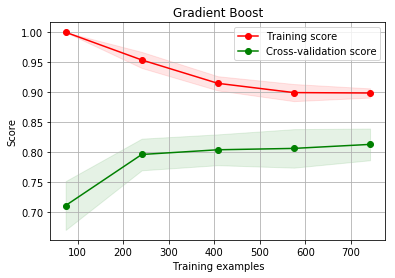

In [233]:
gbc_model = GradientBoostingClassifier(min_samples_split=5, n_estimators=30, max_depth=4)
n_gbc = 10
curve(gbc_model, 'Gradient Boost', X_training_data, y_training_data, n_gbc)
plt.show()

Gradient boost looks like it could use more training examples

## 4.7 Random Forest

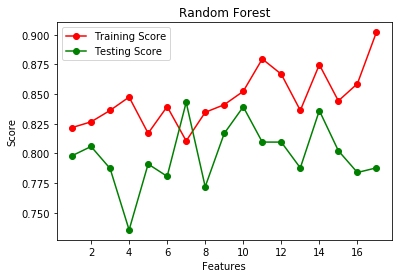

In [237]:
#Random forest
model_rf = RandomForestClassifier()

maxdep = [3,4,5,6]
minsamp = [2,3,4,5]
param_grid = [
    {
        'max_depth': maxdep,
        'min_samples_split': minsamp
    }]

grid_rf = GridSearchCV(model_rf, cv=6, n_jobs=-1, param_grid=param_grid, scoring='accuracy')
train_acc, test_acc, param_lst, comp_lst = n_feat_opt(grid_rf, 'Random Forest', X_training_data, y_training_data)
feat_print(train_acc, test_acc, comp_lst, 'Random Forest')
plt.show()


10 features looks good for Random forest

In [238]:
#Best parameters for optimum feature number
print param_lst[comp_lst.index(10)]

{'min_samples_split': 2, 'max_depth': 3}


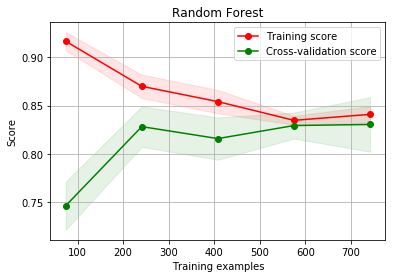

In [239]:
rf_model = RandomForestClassifier(min_samples_split=2, max_depth=3)
n_rf = 10
curve(rf_model, 'Random Forest', X_training_data, y_training_data, n_rf)
plt.show()


Random forest appears to converge around 550 training examples

## 4.8 Ensemble Analysis and Prediction 1
Now we're going to compare the models we have made. For the purposes of making this section simple, I will be training every model with 11 features. This is due to the fact that the voting classifier that will be used trains on a single dataset. The next section will use pipeline methods to wrap feature reduction within the model before feeding it to the voting classifier.

In [241]:
pca = PCA(n_components=11)
X_trans = pca.fit_transform(X_training_data)
X_test_trans = pca.transform(X_testing_data)

svm_model.fit(X_trans, y_training_data)
dt_model.fit(X_trans, y_training_data)
adc_model.fit(X_trans, y_training_data)
gbc_model.fit(X_trans, y_training_data)
rf_model.fit(X_trans, y_training_data)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

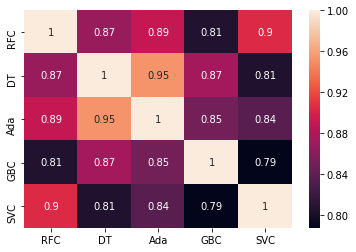

In [243]:
plt.clf()
test_Survived_RFC = pd.Series(rf_model.predict(X_test_trans), name="RFC")
test_Survived_DT = pd.Series(dt_model.predict(X_test_trans), name="DT")
test_Survived_SVMC = pd.Series(svm_model.predict(X_test_trans), name="SVC")
test_Survived_AdaC = pd.Series(adc_model.predict(X_test_trans), name="Ada")
test_Survived_GBC = pd.Series(gbc_model.predict(X_test_trans), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_DT, test_Survived_AdaC, test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)
plt.show()

Looking at the heatmap, it looks like decision tree methods (decision tree, random forest, adaboosted decision trees) are generally in agreement, while gradient boost and SVM differ. Lets feed these into a voting classifier and see what happens.

In [244]:
votingC = VotingClassifier(estimators=[('rfc', rf_model), ('DT', dt_model),
('svc', svm_model),('gbc', gbc_model), ('adc',adc_model)], voting='soft', n_jobs=-1)

votingC = votingC.fit(X_trans, y_training_data)

pred = votingC.predict(X_test_trans)
pred_out_svm = pd.DataFrame(index=test['PassengerId'])
pred_out_svm['Survived'] = pred
pred_out_svm.to_csv('Voting_Prediction_1.csv')

## 4.9 Pipeline Methods And Prediction
Just for fun, we can use the pipeline functionality in sklearn to run feature optimization and parameter optimization all in one go, feed the models into the voting classifier, and optimize everything in one step. Doing this is pretty computationally expensive, but the dataset is small enough that this isn't an issue. This will also allow each estimator to be fit to a different optimum feature number, as determined by the Grid Search. Since we're pipelining all of this, lets add in SelectKBest as another feature selector.

In [245]:
#Svm
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', svm.SVC(probability=True))
])
N_FEATURES_OPTIONS = [5,6,7,8,9,10,11,12,13,14,15,16]
C_OPTIONS = [ 800, 900, 1000, 1100, 1200]
G_OPTIONS = [0.005,0.003, 0.001, 0.0008]
param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS,
        'classify__gamma': G_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS,
        'classify__gamma': G_OPTIONS
    }]
reducer_labels = ['PCA', 'KBest(chi2)']

grid_svm = GridSearchCV(pipe, cv=6, n_jobs=-1, param_grid=param_grid, scoring='accuracy')

In [246]:
#Decision tree
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', DecisionTreeClassifier())
])
N_FEATURES_OPTIONS = [5,6,7,8,9,10,11,12,13,14,15,16]
maxdep = [3,4,5,6]
minsamp = [2,3,4,5]
param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__max_depth': maxdep,
        'classify__min_samples_split': minsamp
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__max_depth': maxdep,
        'classify__min_samples_split': minsamp
    }]
reducer_labels = ['PCA', 'KBest(chi2)']

grid_dt = GridSearchCV(pipe, cv=6, n_jobs=-1, param_grid=param_grid, scoring='accuracy')


In [247]:
#Adaboost
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', AdaBoostClassifier())
])

N_FEATURES_OPTIONS = [5,6,7,8,9,10,11,12,13,14,15,16]
n_est = [30, 50,75,90]
learn = [0.03, 0.04, 0.05, 0.07, 0.1]
param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__n_estimators': n_est,
        'classify__learning_rate': learn
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__n_estimators': n_est,
        'classify__learning_rate': learn
    }]
reducer_labels = ['PCA', 'KBest(chi2)']

grid_adc = GridSearchCV(pipe, cv=6, n_jobs=-1, param_grid=param_grid, scoring='accuracy')


In [248]:
#Gradient boost
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', GradientBoostingClassifier())
])
N_FEATURES_OPTIONS = [5,6,7,8,9,10,11,12,13,14,15,16]
max_dep = [3,4,5,6]
n_est = [30,40,50,80]
min_samp = [4,5,6,10]
param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__n_estimators': n_est,
        'classify__max_depth': max_dep,
        'classify__min_samples_split':min_samp
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__n_estimators': n_est,
        'classify__max_depth': max_dep,
        'classify__min_samples_split':min_samp
    }]
reducer_labels = ['PCA', 'KBest(chi2)']

grid_gbc = GridSearchCV(pipe, cv=6, n_jobs=-1, param_grid=param_grid, scoring='accuracy')


In [249]:
#Random forest
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', RandomForestClassifier())
])

N_FEATURES_OPTIONS = [5,6,7,8,9,10,11,12,13,14,15,16]
maxdep = [3,4,5,6]
minsamp = [2,3,4,5]
param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__max_depth': maxdep,
        'classify__min_samples_split': minsamp
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__max_depth': maxdep,
        'classify__min_samples_split': minsamp
    }]
reducer_labels = ['PCA', 'KBest(chi2)']

grid_rf = GridSearchCV(pipe, cv=6, n_jobs=-1, param_grid=param_grid, scoring='accuracy')


In [250]:
votingC = VotingClassifier(estimators=[('rfc', grid_rf), ('DT', grid_dt),
('svc', grid_svm),('gbc',grid_gbc), ('rf',grid_adc)], voting='soft', n_jobs=-1)

votingC = votingC.fit(X_training_data, y_training_data)

In [257]:
for i in votingC.estimators_:
    print '\n', i.best_estimator_


Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
  ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

Pipeline(memory=None,
     steps=[('reduce_dim', SelectKBest(k=9, score_func=<function chi2 at 0x000000000C5E56D8>)), ('classify', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto

In [258]:
pred = votingC.predict(X_testing_data)
pred_out_svm = pd.DataFrame(index=test['PassengerId'])
pred_out_svm['Survived'] = pred
pred_out_svm.to_csv('Voting_Prediction_2.csv')

# 5. Predictions

## 5.1 Model Predictions
Two predictions were submitted. One for the initial method of tuning each estimator, and one for the pipeline method.

Prediction 1 scored 0.78947 and prediction 2 scored 0.79904. At the time of writing prediction 2's score 0f 0.79904 is in the 16th percentile of all submissions.

## 5.2 Analysis and Conclusions
Looking at the two predictions it looks like the accuracy benefitted from each model being allowed to choose a feature size, rather than setting a single feature size for all models. Originally I designed the first method to do this, creating the pipeline section in the process. When writing this up, I decided to put both as two separate sections to focus on graphical representation of feature selection and learning curves. Trying to do everything in a single pass for each model (optimizing features, developing the voting model, creating data for each model at each feature level in addition to the automatic fitting, creating feature curves for each model and creating learning curves for each model) was a lot to cram together.

This has been my first real machine learning project and writeup. I feel like I've put a lot of hours into tackling this project and the learning curve that came with it. It's satisfying to see it all finally come together. I'm looking forward to continuing my machine learning journey from here.